<b>Sentiment Analysis for Movie Review <b>

In [1]:
import pandas as pd
df = pd.read_csv('movie-Review.csv')
df_or = pd.read_csv('movie-Review.csv')

In [2]:
import numpy as np
np.random.seed(500)

In [3]:
df.describe()

,class,text
count,2000,2000
unique,2,2000
top,Neg,billy bob thornton who had a sudden rise to...
freq,1000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
class    2000 non-null object
text     2000 non-null object
dtypes: object(2)
memory usage: 31.3+ KB


In [5]:
df.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


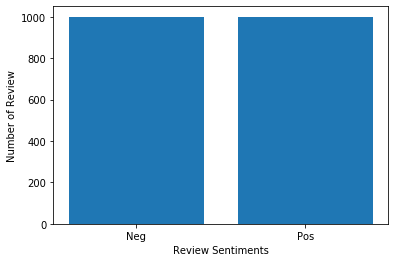

In [43]:
class_count=df.groupby('class').count()
import matplotlib.pyplot as plt
plt.bar(class_count.index.values, class_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [7]:
#Remove number
import re # import all Regular expression functions
df['text']=[re.sub('\d','', i)for i in df['text']]
df.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june a self taught idealistic ye...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [8]:
# Replace punctuations with a white space
import string
df['text']=[re.sub('[%s]' % re.escape(string.punctuation), ' ', i) for i in df['text']]
df.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june a self taught idealistic ye...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [9]:
# Convert in lower case
df['text']=[i.lower() for i in df['text']]

In [10]:
# import pandas as pd 
import pandas as pd 
#Word Tokenization
import nltk # import package for tokenization
#nltk.download('punkt') # download all spporting function /files for NLTK package
from nltk.tokenize import word_tokenize
df['text_wt'] = [word_tokenize(i) for i in df['text']]
df.head()

,class,text,text_wt
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge..."


In [11]:

#To show the stop words
#nltk.download('stopwords') #download Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#Remove All Stop Word
df['text_SW'] = [[i for i in j if not i in stop_words] for j in df['text_wt']]# remove the word which is aviable in stopword libr
df.head()

,class,text,text_wt,text_SW
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had...","[films, adapted, comic, books, plenty, success..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along...","[every, movie, comes, along, suspect, studio, ..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than...","[got, mail, works, alot, better, deserves, ord..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a...","[jaws, rare, film, grabs, attention, shows, si..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge...","[moviemaking, lot, like, general, manager, nfl..."


In [12]:
#nltk.download('tagsets')
#nltk.help.upenn_tagset()# tagset documentation
#nltk.download('wordnet')
from collections import defaultdict #Default Dictionary is imported from collections
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as 
tag_map['R'] = wn.ADV
# we will use it later in the loop.
#tag_map

In [13]:
#lemmatization
from nltk.stem import WordNetLemmatizer 
 # Initializing WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

df['lemma']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in df['text_SW']] 
df.head()

,class,text,text_wt,text_SW,lemma
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had...","[films, adapted, comic, books, plenty, success...","[film, adapt, comic, book, plenty, success, wh..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along...","[every, movie, comes, along, suspect, studio, ...","[every, movie, come, along, suspect, studio, e..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than...","[got, mail, works, alot, better, deserves, ord...","[get, mail, work, alot, good, deserves, order,..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a...","[jaws, rare, film, grabs, attention, shows, si...","[jaw, rare, film, grab, attention, show, singl..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge...","[moviemaking, lot, like, general, manager, nfl...","[moviemaking, lot, like, general, manager, nfl..."


In [14]:
 df['lemma2']= df['lemma'].apply(lambda x: ' '.join(x))

In [15]:
df['lemma2'].head()

0    film adapt comic book plenty success whether s...
1    every movie come along suspect studio every in...
2    get mail work alot good deserves order make fi...
3    jaw rare film grab attention show single image...
4    moviemaking lot like general manager nfl team ...
Name: lemma2, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y1, Test_Y1 = train_test_split(df['lemma2'],df['class'],test_size=0.3)

In [17]:
Test_Y1.head()

83      Pos
885     Pos
1725    Neg
660     Pos
1776    Neg
Name: class, dtype: object

## Label encode the target variable — This is done to transform Categorical data of string type in the data set into numerical values which the model can understand.

In [18]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y1)
Test_Y = Encoder.fit_transform(Test_Y1)
print(Train_Y1[1:5])
print(Train_Y[1:5])
print(Test_Y1[1:5])
print(Test_Y[1:5])

1313    Neg
330     Pos
1923    Neg
760     Pos
Name: class, dtype: object
[0 1 0 1]
885     Pos
1725    Neg
660     Pos
1776    Neg
Name: class, dtype: object
[1 0 1 0]


In [19]:
Train_X.head()

958     calendar year even reach midway point prevent ...
1313    let begin say easily bad movie entire official...
330     one never quite know one go get mamet film ame...
1923    first species moderately successful science fi...
760     italian hitchcock acknowledge master giallo mu...
Name: lemma2, dtype: object

In [20]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
#instantiate CountVectorizer()# CountVectorizer to count the number of words (term frequency)
cv = CountVectorizer(max_features=5000) 
#this steps generates word counts for the words in your docs and return term-document matrix.
Train_X_BOW = cv.fit_transform(Train_X).toarray()
Test_X_BOW = cv.fit_transform(Test_X).toarray()

In [21]:
pd.DataFrame(Train_X_BOW, columns=cv.get_feature_names()).head()

,abandon,ability,able,aboard,abraham,absence,absent,absolute,absolutely,absorb,...,zahn,zane,zany,zellweger,zemeckis,zero,zeta,zone,zoolander,zwick
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
pd.DataFrame(Test_X_BOW, columns=cv.get_feature_names()).head()

,abandon,ability,able,aboard,abraham,absence,absent,absolute,absolutely,absorb,...,zahn,zane,zany,zellweger,zemeckis,zero,zeta,zone,zoolander,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(Train_X_BOW, Train_Y)
predicted= clf.predict(Test_X_BOW)
print("MultinomialNB Accuracy:",round(accuracy_score(predicted,Test_Y)*100,2),"%")

MultinomialNB Accuracy: 54.0 %


In [39]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_BOW,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_BOW)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",round(accuracy_score(predictions_SVM, Test_Y)*100,2),"%")

SVM Accuracy Score ->  55.33 %


In [40]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results 
model = RandomForestClassifier(n_estimators = 501, criterion = 'entropy') 
model.fit(Train_X_BOW, Train_Y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# Predicting the Test set results 
y_pred = model.predict(Test_X_BOW) 


In [42]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Test_Y, y_pred) 
# Use accuracy_score function to get the accuracy
print("Random forest Accuracy Score -> ",round(accuracy_score(y_pred, Test_Y)*100,2),"%")

Random forest Accuracy Score ->  55.17 %
